In [39]:
import multiprocessing
import os
from re import A
from typing import ItemsView

from py import log
os.environ['PYTHONDONTWRITEBYTECODE'] = '1'
from xtquant import xttrader
from xtquant import xtdata
from xtquant.xttrader import XtQuantTrader, XtQuantTraderCallback
from xtquant.xttype import StockAccount
from xtquant import xtconstant
import pandas_market_calendars as mcal
import pandas as pd
import akshare as ak

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
def plot(df, column):
    
    # 设置中文字体
    mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定中文字体为 SimHei
    mpl.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

    # 假设这是你的DataFrame，其中包含收益

    # 绘制收益曲线
    # 将日期列转换为日期类型
    # df['date'] = pd.to_datetime(df['date'])

    # # 设置日期列为索引
    # df.set_index('date', inplace=True)
    df.index = pd.to_datetime(df.index)
    # 绘制收益曲线
    plt.figure(figsize=(10, 6))  # 设置图表大小
    plt.plot(df.index, df[column], label='Return')
    plt.title('收益曲线')
    plt.xlabel('日期')
    plt.ylabel('收益率')
    plt.legend()  # 显示图例
    plt.grid(True)  # 显示网格线

    # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    # plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

    plt.show()

In [40]:
import sqlite3
# months = ['202408', '202409', '202410', '202411', '202412', '202501', '202502' ]
months = ['202501', '202502' ]
combined_df = pd.DataFrame()
for month in months:
    conn = sqlite3.connect('D:\workspace\TradeX\ezMoney\sqlite_db\strategy_data.db')
    db_name = 'strategy_data_aftermarket_%s' % month
    query = "select * from %s where (sub_strategy_name = '低位N字低吸' or strategy_name = 'xiao_cao_dwndx') and stock_rank = 1 " % db_name
    df = pd.read_sql_query(query, conn)
    combined_df = pd.concat([combined_df, df], axis=0)
combined_df = combined_df.reset_index(drop=True)
combined_df.columns

Index(['id', 'date_key', 'strategy_name', 'sub_strategy_name', 'stock_code',
       'stock_name', 'stock_rank', 'block_category', 'block_codes',
       'industry_code', 'max_block_category_rank', 'max_block_code_rank',
       'max_industry_code_rank', 'is_bottom', 'is_broken_plate',
       'is_down_broken', 'is_fall', 'is_first_down_broken',
       'is_first_up_broken', 'is_gestation_line', 'is_half', 'is_high',
       'is_highest', 'is_long_shadow', 'is_low', 'is_medium', 'is_meso',
       'is_plummet', 'is_pre_st', 'is_small_high_open', 'is_up_broken',
       'is_weak', 'first_limit_up_days', 'jsjl', 'cjs', 'xcjw', 'jssb',
       'open_pct_rate', 'open_price', 'close_price', 'pre_close_price',
       'next_day_open_price', 'next_day_close_price',
       'next_day_high_price_open_10mins', 'next_day_low_price_open_10mins',
       'next_day_high_price', 'next_day_low_price', 'in_premarket',
       'in_premarket_match', 'mod_code', 'mod_name', 'mod_short_line_score',
       'mod_short_li

In [41]:
combined_df = combined_df.drop(['env_json_info', 'block_category_info'], axis=1)

# 将索引设置为 date_key 列
combined_df = combined_df.set_index('date_key')

# 对索引进行排序
combined_df = combined_df.sort_index()

combined_df

,id,strategy_name,sub_strategy_name,stock_code,stock_name,stock_rank,block_category,block_codes,industry_code,max_block_category_rank,...,in_premarket_match,mod_code,mod_name,mod_short_line_score,mod_short_line_score_change,mod_short_line_rank,mod_trend_score,mod_trend_score_change,mod_trend_rank,created_at
date_key,,,,,,,,,,,,,,,,,,,,,
2025-01-02,211,低吸,低位N字低吸,603057.XSHG,紫燕食品,1,,,,-1,...,0,9G0080,低位N字低吸,-39.33,-41.43,26,9.21,-1.20,14,2025-02-15 19:21:07
2025-01-02,1693,xiao_cao_dwndx,,603057.XSHG,紫燕食品,1,,,,-1,...,0,,,-100.00,-100.00,-1,-100.00,-100.00,-1,2025-02-16 02:58:49
2025-01-03,267,低吸,低位N字低吸,001277.XSHE,速达股份,1,,,980365.ZHBK,-1,...,0,9G0080,低位N字低吸,-64.40,-25.07,37,-2.95,-29.38,16,2025-02-15 19:22:15
2025-01-03,1697,xiao_cao_dwndx,,002798.XSHE,帝欧家居,1,"000023.BKDL,000010.BKDL,000006.BKDL,000007.BKDL","885420.DDBK,885806.DDBK,885478.DDBK,885729.DDB...","980373.ZHBK,980368.ZHBK",3,...,0,,,-100.00,-100.00,-1,-100.00,-100.00,-1,2025-02-16 02:58:51
2025-01-06,329,低吸,低位N字低吸,600857.XSHG,宁波中百,1,"000012.BKDL,000023.BKDL,000010.BKDL,000004.BKD...","885924.DDBK,885420.DDBK,885788.DDBK,885530.DDB...","980374.ZHBK,980345.ZHBK",7,...,0,9G0080,低位N字低吸,-82.48,-18.08,37,-11.69,-9.12,19,2025-02-15 19:23:27
2025-01-06,1703,xiao_cao_dwndx,,600857.XSHG,宁波中百,1,"000012.BKDL,000023.BKDL,000010.BKDL,000004.BKD...","885924.DDBK,885420.DDBK,885788.DDBK,885530.DDB...","980374.ZHBK,980345.ZHBK",7,...,0,,,-100.00,-100.00,-1,-100.00,-100.00,-1,2025-02-16 02:58:53
2025-01-07,379,低吸,低位N字低吸,001314.XSHE,亿道信息,1,"000012.BKDL,000003.BKDL,000038.BKDL,000026.BKD...","885840.DDBK,886048.DDBK,885598.DDBK,885517.DDB...",980357.ZHBK,1,...,0,9G0080,低位N字低吸,-92.98,-10.50,42,-25.70,-9.18,20,2025-02-15 19:24:34
2025-01-07,1708,xiao_cao_dwndx,,001314.XSHE,亿道信息,1,"000012.BKDL,000003.BKDL,000038.BKDL,000026.BKD...","885840.DDBK,886048.DDBK,885598.DDBK,885517.DDB...",980357.ZHBK,1,...,0,,,-100.00,-100.00,-1,-100.00,-100.00,-1,2025-02-16 02:58:55
2025-01-08,414,低吸,低位N字低吸,603118.XSHG,共进股份,1,"000012.BKDL,000003.BKDL,000026.BKDL,000006.BKD...","885840.DDBK,885459.DDBK,885843.DDBK,886009.DDB...",980376.ZHBK,2,...,0,9G0080,低位N字低吸,-74.58,18.40,46,-17.57,-2.26,22,2025-02-15 19:25:37


In [42]:
dwndx = combined_df[combined_df['strategy_name'] == '低吸']
dwndx['return'] = dwndx['next_day_open_price']/dwndx['open_price'] - 1
dwndx['real_return'] =  dwndx['return'] - 0.003
dwndx['cumulative_returns'] = (1 + dwndx['return']).cumprod()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_29488\594110491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dwndx['return'] = dwndx['next_day_open_price']/dwndx['open_price'] - 1
C:\Users\Administrator\AppData\Local\Temp\ipykernel_29488\594110491.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dwndx['real_return'] =  dwndx['return'] - 0.003
C:\Users\Administrator\AppData\Local\Temp\ipykernel_29488\594110491.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [43]:
def caculate_returns(returns_df, row, _print = False):
    r = {}
    cumulative_returns = (1 + returns_df[row]).cumprod()

    # 计算最大回撤
    cumulative_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns - cumulative_max) / cumulative_max
    max_drawdown = drawdown.min()

    # 计算夏普比率
    risk_free_rate = 0.0  # 假设无风险利率为0
    sharpe_ratio = (returns_df[row].mean() - risk_free_rate) / returns_df[row].std()

    # 计算总收益率
    total_return = cumulative_returns.iloc[-1] - 1

    # 计算波动率
    volatility = returns_df[row].std()

    # 计算总盈亏
    total_profit_loss = cumulative_returns.iloc[-1] - cumulative_returns.iloc[0]

    # 计算成功次数、胜率、平均盈利、平均亏损、最大盈利、最大亏损以及盈亏比
    profitable_trades = returns_df[row][returns_df[row] > 0].count()
    losing_trades = returns_df[row][returns_df[row] < 0].count()
    win_rate = profitable_trades / (profitable_trades + losing_trades) if (profitable_trades + losing_trades) > 0 else 0
    average_profit = returns_df[row][returns_df[row] > 0].mean() if profitable_trades > 0 else 0
    average_loss = returns_df[row][returns_df[row] < 0].mean() if losing_trades > 0 else 0
    max_profit = returns_df[row].max()
    max_loss = returns_df[row].min()
    total_trades = profitable_trades + losing_trades
    total_times = returns_df[row].count()
    trade_pct = total_times / total_trades
    profit_loss_ratio = average_profit / abs(average_loss) if average_loss != 0 else 0
    kelly_fraction = win_rate - ((1 - win_rate) / profit_loss_ratio) if profit_loss_ratio != 0 else 0
    return_per_day = total_return / total_times
    year_return = return_per_day * 365

    r['最大回撤'] =  max_drawdown
    r['夏普比率'] =  sharpe_ratio
    r['总收益率'] =  total_return
    r['波动率'] = volatility
    r['年化收益率'] = year_return
    r['总盈亏'] = total_profit_loss
    r['成功次数'] = profitable_trades
    r['失败次数'] = losing_trades
    r['总天数'] = total_times
    r['总交易次数'] = total_trades
    r['交易频率'] = trade_pct
    r['胜率'] = win_rate
    r['平均盈利'] = average_profit
    r['平均亏损'] = average_loss
    r['最大盈利'] = max_profit
    r['最大亏损'] = max_loss
    r['盈亏比'] = profit_loss_ratio
    r['凯利公式最佳仓位'] = kelly_fraction
    if _print:
        print(f"最大回撤: {max_drawdown:.2%}")
        print(f"夏普比率: {sharpe_ratio:.2f}")
        print(f"总收益率: {total_return:.2%}")
        print(f"年化收益率: {year_return:.2%}")
        print(f"波动率: {volatility:.2%}")
        print(f"总盈亏: {total_profit_loss:.2%}")
        print(f"成功次数: {profitable_trades}")
        print(f"失败次数: {losing_trades}")
        print(f"总天数: {total_times}")
        print(f"总交易次数: {total_trades}")
        print(f"交易频率: {trade_pct:.2%}")
        print(f"胜率: {win_rate:.2%}")
        print(f"平均盈利: {average_profit:.2%}")
        print(f"平均亏损: {average_loss:.2%}")
        print(f"最大盈利: {max_profit:.2%}")
        print(f"最大亏损: {max_loss:.2%}")
        print(f"盈亏比: {profit_loss_ratio:.2f}")
        print(f"凯利公式最佳仓位: {kelly_fraction:.2%}")

    return r

In [44]:
print("return:")
caculate_returns(dwndx, 'real_return', _print=True)
print('-----------------------------------------------------')

return:
最大回撤: -13.30%
夏普比率: 0.21
总收益率: 30.17%
年化收益率: 478.74%
波动率: 6.49%
总盈亏: 30.92%
成功次数: 12
失败次数: 11
总天数: 23
总交易次数: 23
交易频率: 100.00%
胜率: 52.17%
平均盈利: 5.54%
平均亏损: -3.23%
最大盈利: 16.35%
最大亏损: -11.28%
盈亏比: 1.72
凯利公式最佳仓位: 24.30%
-----------------------------------------------------


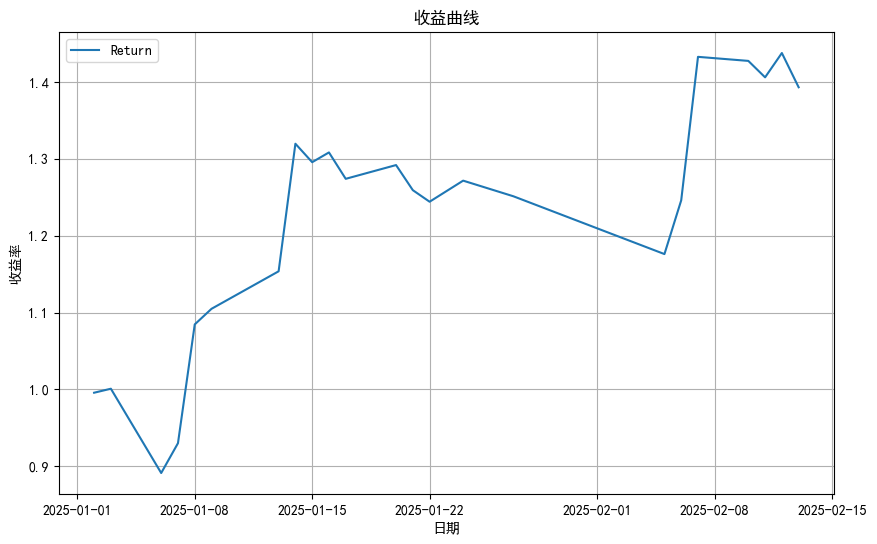

In [45]:
plot(dwndx, 'cumulative_returns')

In [46]:
dwndx1 = dwndx[['stock_code', 'stock_name', 'open_price', 'max_block_category_rank','max_block_code_rank','max_industry_code_rank','close_price', 'next_day_open_price', 'next_day_close_price', 'real_return', 'mod_short_line_rank', 'mod_name','mod_short_line_rank', 'mod_trend_rank', 'return',
       'real_return', 'cumulative_returns']]
dwndx1

,stock_code,stock_name,open_price,max_block_category_rank,max_block_code_rank,max_industry_code_rank,close_price,next_day_open_price,next_day_close_price,real_return,mod_short_line_rank,mod_name,mod_short_line_rank,mod_trend_rank,return,real_return,cumulative_returns
date_key,,,,,,,,,,,,,,,,,
2025-01-02,603057.XSHG,紫燕食品,19.99,-1,-1,-1,20.46,19.90,18.41,-0.007502,26,低位N字低吸,26,14,-0.004502,-0.007502,0.995498
2025-01-03,001277.XSHE,速达股份,38.10,-1,-1,29,38.55,38.30,40.04,0.002249,37,低位N字低吸,37,16,0.005249,0.002249,1.000723
2025-01-06,600857.XSHG,宁波中百,8.38,7,45,100,8.29,7.46,7.90,-0.112785,37,低位N字低吸,37,19,-0.109785,-0.112785,0.890859
2025-01-07,001314.XSHE,亿道信息,46.96,1,2,30,49.96,49.01,48.28,0.040654,42,低位N字低吸,42,20,0.043654,0.040654,0.929749
2025-01-08,603118.XSHG,共进股份,9.25,2,1,40,10.57,10.79,11.63,0.163486,46,低位N字低吸,46,22,0.166486,0.163486,1.084539
2025-01-09,003003.XSHE,天元股份,10.13,4,18,39,10.56,10.32,9.50,0.015756,6,低位N字低吸,6,7,0.018756,0.015756,1.104881
2025-01-13,600858.XSHG,银座股份,5.20,4,2,47,5.46,5.43,6.01,0.041231,4,低位N字低吸,4,2,0.044231,0.041231,1.153751
2025-01-14,002660.XSHE,茂硕电源,9.09,1,10,37,10.43,10.40,10.16,0.141114,5,低位N字低吸,5,2,0.144114,0.141114,1.320023
2025-01-15,002213.XSHE,大为股份,14.26,2,10,47,13.78,14.00,13.47,-0.021233,2,低位N字低吸,2,2,-0.018233,-0.021233,1.295955


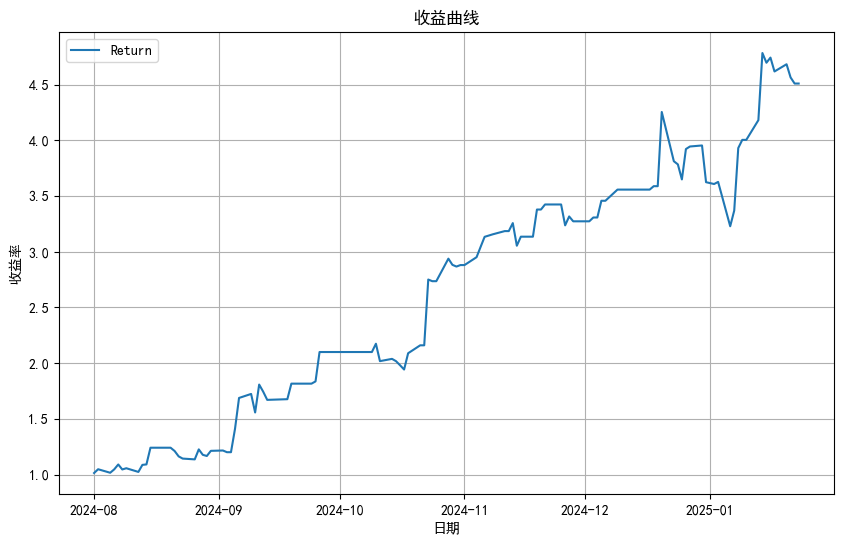

In [166]:
plot(df, 'first_cumulative_returns')

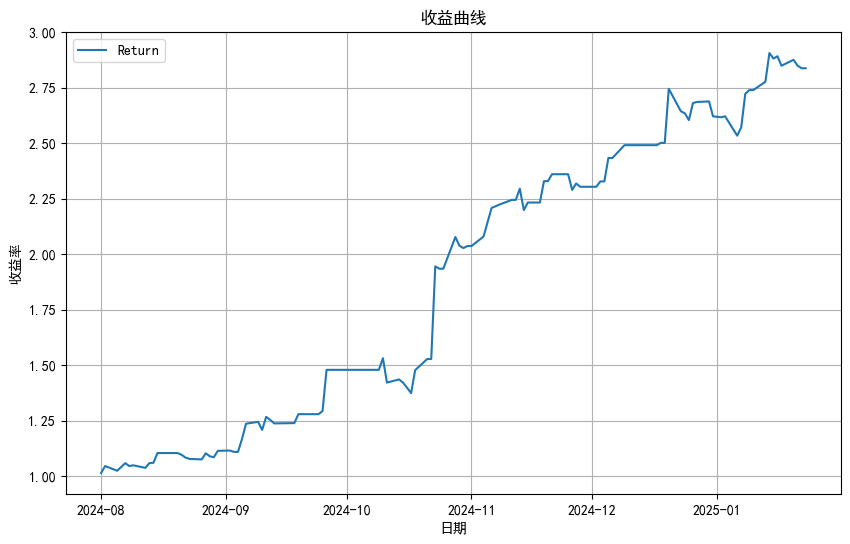

In [167]:
plot(df, 'p_first_cumulative_returns')

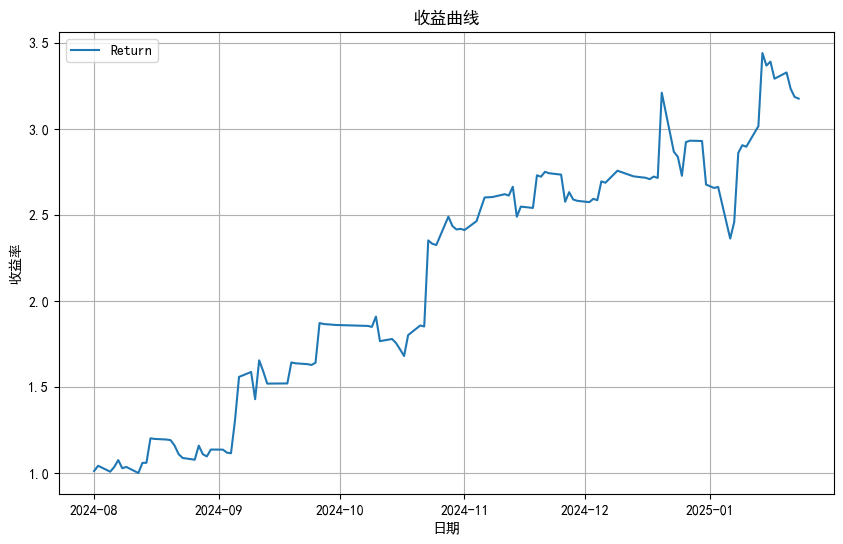

In [168]:
plot(df, 'hd_cumulative_returns')

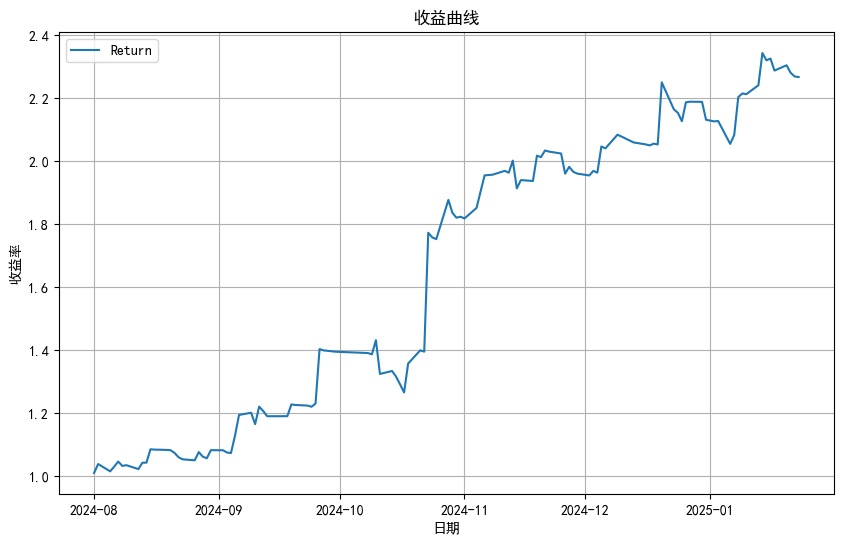

In [169]:
plot(df, 'hd_p_cumulative_returns')

In [170]:
len(df_g_zero)

87

In [171]:
len(df)

118

In [172]:
len(df)/len(df_g_zero)

1.3563218390804597

In [116]:
df_after_date = df.loc[df.index >= '2025-01-01']
df_after_date['cumulative_returns'] = (1 + df_after_date['return']).cumprod()
df_after_date['p_return'] = df_after_date['return'] * df_after_date['position']
df_after_date['p_cumulative_returns'] = (1 + df_after_date['p_return']).cumprod()
df_after_date['first_cumulative_returns'] = (1 + df_after_date['first_return']).cumprod()
df_after_date['p_first_return'] = df_after_date['first_return'] * df_after_date['position']
df_after_date['p_first_cumulative_returns'] = (1 + df_after_date['p_first_return']).cumprod()
df_after_date_g_zero = df_after_date[df_after_date['codes_num'] > 0]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4620\1530999281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_date['cumulative_returns'] = (1 + df_after_date['return']).cumprod()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4620\1530999281.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_date['p_return'] = df_after_date['return'] * df_after_date['position']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4620\1530999281.py:4: SettingWithCopyWarning: 
A value is tryi

In [56]:
print("return:")
caculate_returns(df_after_date_g_zero, 'return', True)
print('-------------------------------------------------------------------')

return:
最大回撤: -10.98%
夏普比率: 0.26
总收益率: 24.44%
年化收益率: 637.23%
波动率: 6.93%
总盈亏: 24.89%
成功次数: 8
失败次数: 6
总天数: 14
总交易次数: 14
交易频率: 100.00%
胜率: 57.14%
平均盈利: 5.58%
平均亏损: -3.27%
最大盈利: 16.65%
最大亏损: -10.98%
盈亏比: 1.71
凯利公式最佳仓位: 32.04%
-------------------------------------------------------------------


In [57]:
print("p return:")
caculate_returns(df_after_date_g_zero, 'p_return', True)
print("---------------------------------------------------------------------")


p return:
最大回撤: -3.33%
夏普比率: 0.25
总收益率: 8.27%
年化收益率: 215.70%
波动率: 2.35%
总盈亏: 8.42%
成功次数: 8
失败次数: 6
总天数: 14
总交易次数: 14
交易频率: 100.00%
胜率: 57.14%
平均盈利: 1.93%
平均亏损: -1.19%
最大盈利: 5.87%
最大亏损: -3.33%
盈亏比: 1.62
凯利公式最佳仓位: 30.77%
---------------------------------------------------------------------


In [58]:
print("first return:")
caculate_returns(df_after_date_g_zero, 'first_return', True)
print("----------------------------------------------------------------------")


first return:
最大回撤: -10.98%
夏普比率: 0.26
总收益率: 24.44%
年化收益率: 637.23%
波动率: 6.93%
总盈亏: 24.89%
成功次数: 8
失败次数: 6
总天数: 14
总交易次数: 14
交易频率: 100.00%
胜率: 57.14%
平均盈利: 5.58%
平均亏损: -3.27%
最大盈利: 16.65%
最大亏损: -10.98%
盈亏比: 1.71
凯利公式最佳仓位: 32.04%
----------------------------------------------------------------------


In [59]:
print("p first_return:")
caculate_returns(df_after_date_g_zero, 'p_first_return', True)
print("-----------------------------------------------------------------------")

p first_return:
最大回撤: -3.33%
夏普比率: 0.25
总收益率: 8.27%
年化收益率: 215.70%
波动率: 2.35%
总盈亏: 8.42%
成功次数: 8
失败次数: 6
总天数: 14
总交易次数: 14
交易频率: 100.00%
胜率: 57.14%
平均盈利: 1.93%
平均亏损: -1.19%
最大盈利: 5.87%
最大亏损: -3.33%
盈亏比: 1.62
凯利公式最佳仓位: 30.77%
-----------------------------------------------------------------------


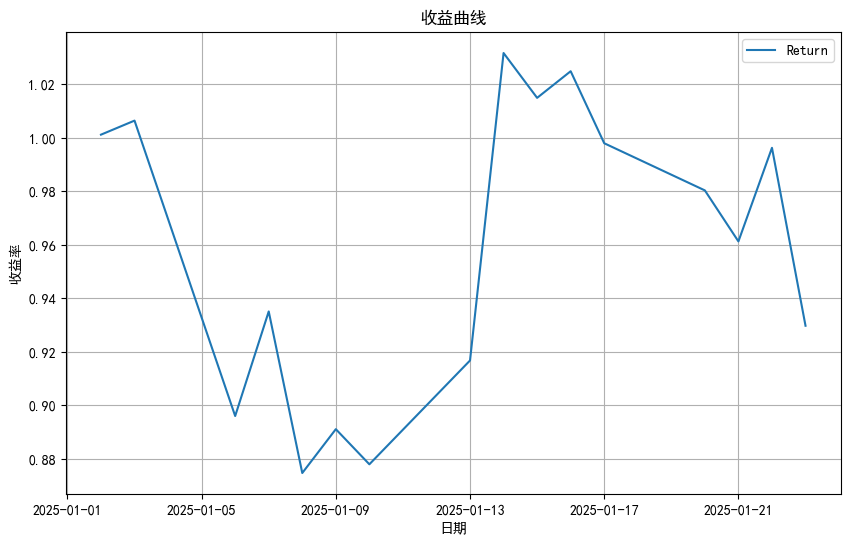

In [23]:
plot(df_after_date, 'cumulative_returns')

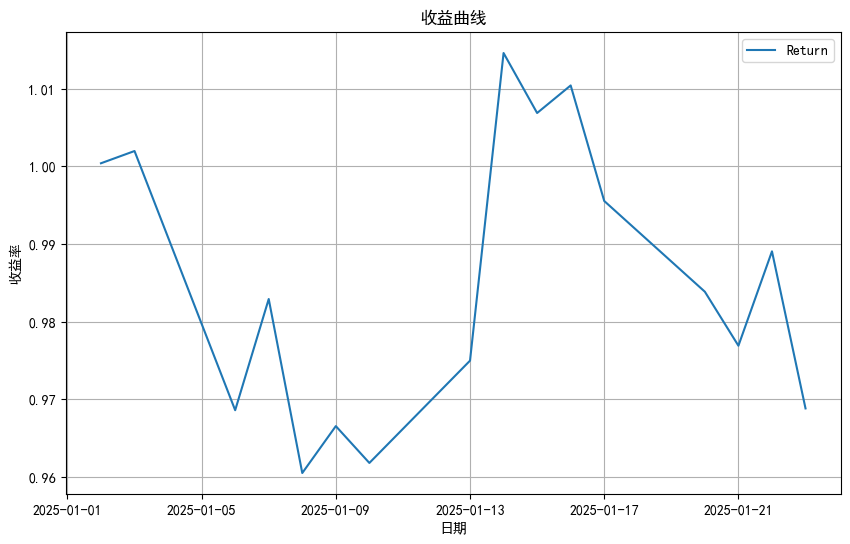

In [24]:
plot(df_after_date, 'p_cumulative_returns')

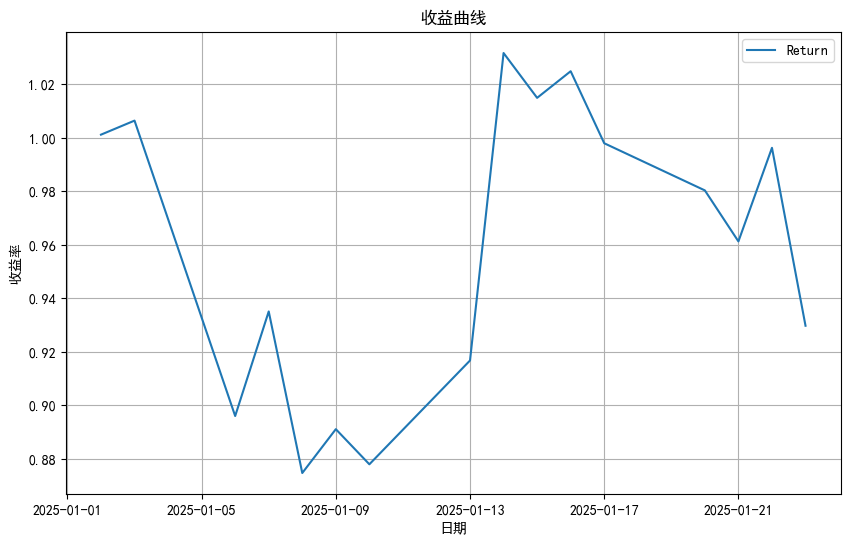

In [25]:
plot(df_after_date, 'first_cumulative_returns')

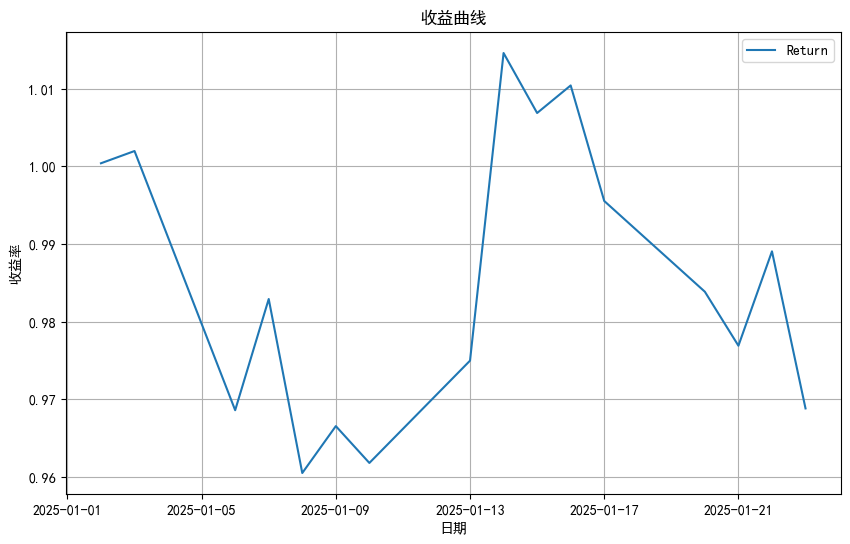

In [26]:
plot(df_after_date, 'p_first_cumulative_returns')

In [27]:
0.008906*0.3

0.0026718

In [28]:
3.61*0.3

1.083

In [29]:
df_g_zero

,code,strategy_name,sub_strategy_name,return,max_return,first_return,top2_return,top3_return,position,codes_num,trendScore,shortLineScore,shortLineScoreChange,cumulative_returns,p_return,p_cumulative_returns,first_cumulative_returns,p_first_return,p_first_cumulative_returns,p3_return,p3_cumulative_returns,p3_first_return,p3_first_cumulative_returns
date,,,,,,,,,,,,,,,,,,,,,,,
2024-08-01,605178.0,低吸,低位低吸,0.002224,0.002224,0.002224,0.002224,0.002224,1.000000,1,15.83,53.76,25.35,1.002224,0.002224,1.002224,1.002224,0.002224,1.002224,0.000222,1.000222,0.000334,1.000334
2024-08-02,603082.0,低吸,低位低吸,0.033478,0.033478,0.033478,0.033478,0.033478,0.927208,1,17.33,53.90,0.14,1.035776,0.031041,1.033334,1.035776,0.031041,1.033334,0.003348,1.003571,0.005022,1.005357
2024-08-05,1316.0,低吸,低位低吸,-0.037152,-0.037152,-0.037152,-0.037152,-0.037152,0.675140,1,10.36,37.66,-16.24,0.997295,-0.025083,1.007415,0.997295,-0.025083,1.007415,-0.003715,0.999842,-0.005573,0.999754
2024-08-06,16.0,低吸,低位低吸,-0.097473,-0.097473,-0.097473,-0.097473,-0.097473,0.551162,1,-5.12,9.67,-27.99,0.900086,-0.053723,0.953294,0.900086,-0.053723,0.953294,-0.009747,0.990097,-0.014621,0.985137
2024-08-07,2278.0,低吸,低位低吸,0.041943,0.041943,0.041943,0.041943,0.041943,0.396782,1,-13.50,-18.09,-27.76,0.937838,0.016642,0.969158,0.937838,0.016642,0.969158,0.004194,0.994249,0.006291,0.991335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-17,3042.0,低吸,低位低吸,-0.026283,-0.026283,-0.026283,-0.026283,-0.026283,0.560071,1,16.56,30.03,20.65,2.620187,-0.014720,2.405669,2.620187,-0.014720,2.405669,-0.002628,1.123770,-0.003942,1.189183
2025-01-20,603808.0,低吸,低位低吸,-0.017677,-0.017677,-0.017677,-0.017677,-0.017677,0.664101,1,4.97,22.67,-7.36,2.573871,-0.011739,2.377428,2.573871,-0.011739,2.377428,-0.001768,1.121784,-0.002652,1.186029
2025-01-21,2291.0,低吸,低位低吸,-0.019461,-0.019461,-0.019461,-0.019461,-0.019461,0.363078,1,-2.88,-26.12,-48.79,2.523780,-0.007066,2.360629,2.523780,-0.007066,2.360629,-0.001946,1.119600,-0.002919,1.182567


# 不按凯利公式调仓
## return
- 最大回撤: -20.73%
- 夏普比率: 0.09
- 总收益率: 14.75%
- 波动率: 5.90%
- 最大收益: 16.11%
- 总盈亏: 11.40%
- 成功次数: 19
- 胜率: 51.35%
- 平均盈利: 5.08%
- 平均亏损: -4.25%
- 最大盈利: 16.11%
- 最大亏损: -8.12%
- 盈亏比: 1.20
- 凯利公式最佳仓位: 10.67%

## p return
- 最大回撤: -13.76%
- 夏普比率: 0.19
- 总收益率: 28.26%
- 波动率: 3.91%
- 最大收益: 14.37%
- 总盈亏: 25.16%
- 成功次数: 19
- 胜率: 51.35%
- 平均盈利: 3.46%
- 平均亏损: -2.12%
- 最大盈利: 14.37%
- 最大亏损: -4.99%
- 盈亏比: 1.64
- 凯利公式最佳仓位: 21.61%

## first return
- 最大回撤: -13.93%
- 夏普比率: 0.12
- 总收益率: 23.89%
- 波动率: 5.88%
- 最大收益: 16.11%
- 总盈亏: 20.55%
- 成功次数: 20
- 胜率: 54.05%
- 平均盈利: 4.98%
- 平均亏损: -4.23%
- 最大盈利: 16.11%
- 最大亏损: -9.67%
- 盈亏比: 1.18
- 凯利公式最佳仓位: 15.04%

## p first_return
- 最大回撤: -13.74%
- 夏普比率: 0.20
- 总收益率: 31.27%
- 波动率: 3.85%
- 最大收益: 14.37%
- 总盈亏: 28.17%
- 成功次数: 20
- 胜率: 54.05%
- 平均盈利: 3.30%
- 平均亏损: -2.12%
- 最大盈利: 14.37%
- 最大亏损: -4.99%
- 盈亏比: 1.55
- 凯利公式最佳仓位: 24.50%

## p3 return
- 最大回撤: -6.54%
- 夏普比率: 0.09
- 总收益率: 5.59%
- 波动率: 1.77%
- 最大收益: 4.83%
- 总盈亏: 4.58%
- 成功次数: 19
- 胜率: 51.35%
- 平均盈利: 1.52%
- 平均亏损: -1.27%
- 最大盈利: 4.83%
- 最大亏损: -2.44%
- 盈亏比: 1.20
- 凯利公式最佳仓位: 10.67%

## p3 first return
- 最大回撤: -4.28%
- 夏普比率: 0.12
- 总收益率: 8.05%
- 波动率: 1.76%
- 最大收益: 4.83%
- 总盈亏: 7.04%
- 成功次数: 20
- 胜率: 54.05%
- 平均盈利: 1.50%
- 平均亏损: -1.27%
- 最大盈利: 4.83%
- 最大亏损: -2.90%
- 盈亏比: 1.18
- 凯利公式最佳仓位: 15.04%


<!-- return:
最大回撤: -20.73%
夏普比率: 0.04
总收益率: 1.99%
波动率: 5.35%
最大收益: 10.37%
总盈亏: 5.31%
None
p return:
最大回撤: -7.64%
夏普比率: 0.21
总收益率: 14.38%
波动率: 3.52%
最大收益: 10.37%
总盈亏: 17.71%
None
first return:
最大回撤: -12.83%
夏普比率: 0.13
总收益率: 12.16%
波动率: 5.23%
最大收益: 10.37%
总盈亏: 15.49%
None
p first_return:
最大回撤: -4.61%
夏普比率: 0.26
总收益率: 18.58%
波动率: 3.44%
最大收益: 10.37%
总盈亏: 21.91%
None -->


# 按照凯利公式调仓
## return
- 最大回撤: -20.73%
- 夏普比率: 0.09
- 总收益率: 14.75%
- 波动率: 5.90%
- 最大收益: 16.11%
- 总盈亏: 11.40%
- 成功次数: 19
- 总次数: 37
- 胜率: 51.35%
- 平均盈利: 5.08%
- 平均亏损: -4.25%
- 最大盈利: 16.11%
- 最大亏损: -8.12%
- 盈亏比: 1.20
- 凯利公式最佳仓位: 10.67%

## p return
- 最大回撤: -13.76%
- 夏普比率: 0.19
- 总收益率: 28.26%
- 波动率: 3.91%
- 最大收益: 14.37%
- 总盈亏: 25.16%
- 成功次数: 19
- 总次数: 37
- 胜率: 51.35%
- 平均盈利: 3.46%
- 平均亏损: -2.12%
- 最大盈利: 14.37%
- 最大亏损: -4.99%
- 盈亏比: 1.64
- 凯利公式最佳仓位: 21.61%

## first return
- 最大回撤: -13.93%
- 夏普比率: 0.12
- 总收益率: 23.89%
- 波动率: 5.88%
- 最大收益: 16.11%
- 总盈亏: 20.55%
- 成功次数: 20
- 总次数: 37
- 胜率: 54.05%
- 平均盈利: 4.98%
- 平均亏损: -4.23%
- 最大盈利: 16.11%
- 最大亏损: -9.67%
- 盈亏比: 1.18
- 凯利公式最佳仓位: 15.04%

## p first_return
- 最大回撤: -13.74%
- 夏普比率: 0.20
- 总收益率: 31.27%
- 波动率: 3.85%
- 最大收益: 14.37%
- 总盈亏: 28.17%
- 成功次数: 20
- 总次数: 37
- 胜率: 54.05%
- 平均盈利: 3.30%
- 平均亏损: -2.12%
- 最大盈利: 14.37%
- 最大亏损: -4.99%
- 盈亏比: 1.55
- 凯利公式最佳仓位: 24.50%

## p3 return
- 最大回撤: -2.21%
- 夏普比率: 0.09
- 总收益率: 1.96%
- 波动率: 0.59%
- 最大收益: 1.61%
- 总盈亏: 1.62%
- 成功次数: 19
- 总次数: 37
- 胜率: 51.35%
- 平均盈利: 0.51%
- 平均亏损: -0.42%
- 最大盈利: 1.61%
- 最大亏损: -0.81%
- 盈亏比: 1.20
- 凯利公式最佳仓位: 10.67%

## p3 first return
- 最大回撤: -2.15%
- 夏普比率: 0.12
- 总收益率: 4.10%
- 波动率: 0.88%
- 最大收益: 2.42%
- 总盈亏: 3.59%
- 成功次数: 20
- 总次数: 37
- 胜率: 54.05%
- 平均盈利: 0.75%
- 平均亏损: -0.63%
- 最大盈利: 2.42%
- 最大亏损: -1.45%
- 盈亏比: 1.18
- 凯利公式最佳仓位: 15.04%


# 10月15号后
## return
- 最大回撤: -20.73%
- 夏普比率: 0.04
- 总收益率: 1.99%
- 波动率: 5.35%
- 最大收益: 10.37%
- 总盈亏: 5.31%
- 成功次数: 10
- 总次数: 19
- 胜率: 52.63%
- 平均盈利: 4.50%
- 平均亏损: -4.48%
- 最大盈利: 10.37%
- 最大亏损: -8.12%
- 盈亏比: 1.00
- 凯利公式最佳仓位: 5.48%

## p return
- 最大回撤: -7.64%
- 夏普比率: 0.21
- 总收益率: 14.38%
- 波动率: 3.52%
- 最大收益: 10.37%
- 总盈亏: 17.71%
- 成功次数: 10
- 总次数: 19
- 胜率: 52.63%
- 平均盈利: 3.30%
- 平均亏损: -2.04%
- 最大盈利: 10.37%
- 最大亏损: -4.61%
- 盈亏比: 1.62
- 凯利公式最佳仓位: 23.34%

## first return
- 最大回撤: -12.83%
- 夏普比率: 0.13
- 总收益率: 12.16%
- 波动率: 5.23%
- 最大收益: 10.37%
- 总盈亏: 15.49%
- 成功次数: 11
- 总次数: 19
- 胜率: 57.89%
- 平均盈利: 4.49%
- 平均亏损: -4.41%
- 最大盈利: 10.37%
- 最大亏损: -8.12%
- 盈亏比: 1.02
- 凯利公式最佳仓位: 16.54%

## p first_return
- 最大回撤: -4.61%
- 夏普比率: 0.26
- 总收益率: 18.58%
- 波动率: 3.44%
- 最大收益: 10.37%
- 总盈亏: 21.91%
- 成功次数: 11
- 总次数: 19
- 胜率: 57.89%
- 平均盈利: 3.13%
- 平均亏损: -2.03%
- 最大盈利: 10.37%
- 最大亏损: -4.61%
- 盈亏比: 1.54
- 凯利公式最佳仓位: 30.60%
